In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [26]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [27]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [28]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [30]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [32]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [33]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [34]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [138]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [140]:
import nltk 

In [141]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time

In [142]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [7]:
# sent_analyzer = SentimentIntensityAnalyzer()

# rev1 = "The hotel was very good, I love it!"
# rev2 = "It was just horrible, the worst ever."

# print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

# print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

review 1:
The hotel was very good, I love it!
Score: {'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

review 2:
It was just horrible, the worst ever.
Score: {'neg': 0.603, 'neu': 0.397, 'pos': 0.0, 'compound': -0.8225}


In [143]:
analyzer = SentimentIntensityAnalyzer()

In [144]:
data['polarity'] = data['negative_review'].apply(lambda x: analyzer.polarity_scores(x))
data.tail(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,polarity
515735,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084,1,8.3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
515736,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066,1,9.2,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
515737,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,1,8.8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [145]:
data = pd.concat(
    [data.drop(['polarity'], axis=1), 
     data['polarity'].apply(pd.Series)], axis=1)
data.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,sample,reviewer_score,neg,neu,pos,compound
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,0.129,0.747,0.125,-0.0554
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0,0.216,0.784,0.000,-0.2960
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0,0.0,0.000,1.000,0.000,0.0000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [147]:
# создаем дополнительные признаки на основании тегов
data['stayed 1 night'] = np.where(data['tags'].str.contains('Stayed 1 night'), 1, 0)
data['leisure'] = np.where(data['tags'].str.contains('Leisure trip'), 1, 0)
data['business'] = np.where(data['tags'].str.contains('Business trip'), 1, 0)
data['couple'] = np.where(data['tags'].str.contains('Couple'), 1, 0)
data['mobile'] = np.where(data['tags'].str.contains('Submitted from a mobile device'), 1, 0)

In [130]:
# data['tags'][276552]

"[' Business trip ', ' Solo traveler ', ' Executive Room ', ' Stayed 1 night ']"

In [148]:
data['lat'].fillna(0, inplace=True)
data['lng'].fillna(0, inplace=True)

In [149]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
neg                                           

<AxesSubplot:>

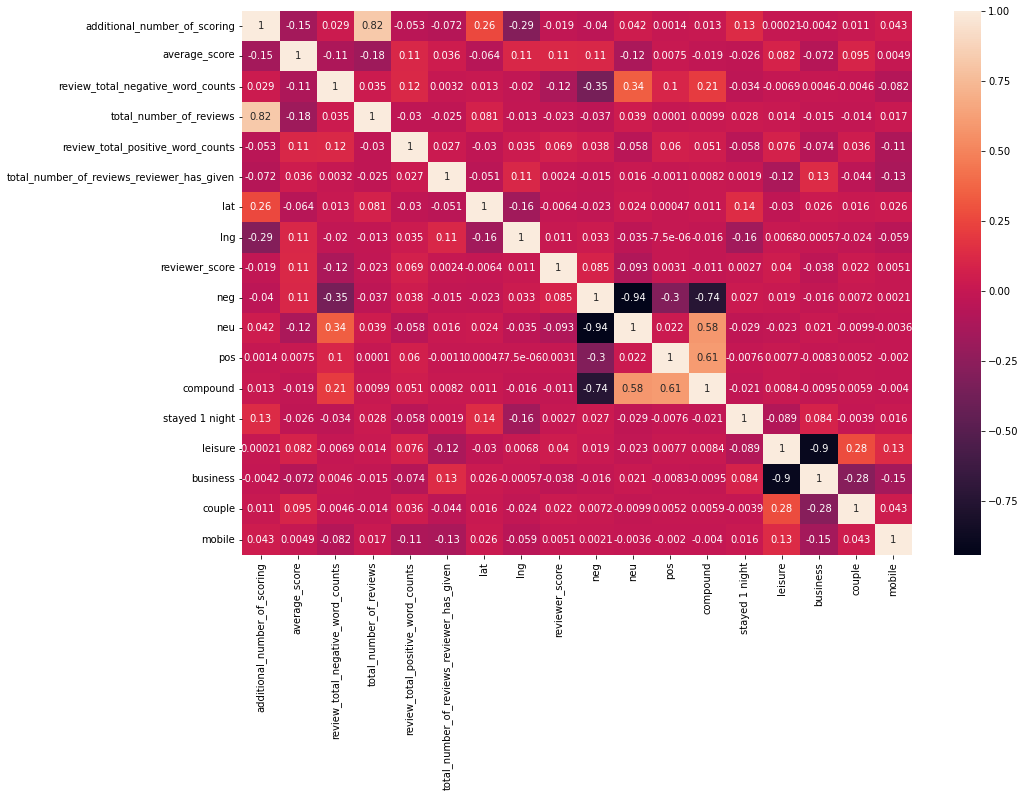

In [150]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [244]:
data.drop(['business'], axis = 1, inplace = True) # после анализа мультиколлинеарности удаляем избыточный признак

In [151]:
# приводим колонку days_since_review в числовой вид
data['days_since_review'] = data['days_since_review'].str.replace(' day', '')
data['days_since_review'] = data['days_since_review'].str.replace('s', '').astype(int)

In [152]:
# Переводим дату отзыва в правильный формат
data['review_date'] = pd.to_datetime(data['review_date'])

In [153]:
# Создаем столбцы с годом и месяцем
data['review_year'] = data['review_date'].dt.year
data['review_month'] = data['review_date'].dt.month

In [154]:
data['review_year'].head(2)

0    2017
1    2016
Name: review_year, dtype: int64

In [155]:
data['review_month'].head(2)

0     7
1    12
Name: review_month, dtype: int64

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [157]:
# бинарное кодирование признака национальонсть

import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,review_year,review_month,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,2017,7,0,0,0,0,0,0,0,1
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,2016,12,0,0,0,0,0,0,1,0


In [158]:
# проверяем, как записывается адрес 
display(data['hotel_address'][0])
display(data['hotel_address'][123])

'Via Senigallia 6 20161 Milan Italy'

'6 Frith Street Soho Westminster Borough London W1D 3JA United Kingdom'

In [159]:
# создаем новый признак Страна на основе адреса
data['country'] = data['hotel_address'].str.split().str[-1]
data['country'].replace('Kingdom', 'United Kingdom', inplace=True) # корректируем название для United Kingdom

# проверяем, какое количество стран у нас получилось
data['country'].nunique()

6

In [160]:
# кодируем страны через OneHotEncoder
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['country'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

data.head(2)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,country,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,country_France,country_Austria
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0,1,Italy,1,0,0,0,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0,1,0,Netherlands,0,1,0,0,0,0


In [64]:
# # Добавляем столбец с индексом
# data['index'] = data['hotel_address'].str.split().str[-3]
# data['index'].head()

0    20161
1       EW
2    08008
3    20124
4       WJ
Name: index, dtype: object

In [65]:
# # расчитываем средние lat и lng по индексу
# groupped = data.groupby(['index']).agg({'lat': 'mean', 'lng': 'mean'}).reset_index()

# groupped

,index,lat,lng
0,08001,41.380069,2.170528
1,08002,41.384013,2.172547
2,08003,41.385711,2.179018
3,08004,41.373441,2.156438
4,08005,41.394115,2.199378
...,...,...,...
561,XL,52.356092,4.885823
562,XP,52.392368,4.911044
563,ZD,52.361381,4.883259
564,ZP,52.358382,4.898878


In [66]:
# groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   566 non-null    object 
 1   lat     566 non-null    float64
 2   lng     566 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.4+ KB


In [67]:
# groupped.rename(columns = {'lat':'lat_mean', 'lng': 'lng_mean'}, inplace = True ) # для удобства переименовываем столбцы

In [68]:
# groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     566 non-null    object 
 1   lat_mean  566 non-null    float64
 2   lng_mean  566 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.4+ KB


In [69]:
# # заполняем пропущенные значения lat и lng
# # добавляем в таблицу столбцы со средними значениями
# data = pd.merge(data, groupped, how='left', on='index')

# # заполняем пропуски из столбцов со средними значениями

# data['lat'].fillna(data['lat_mean'], inplace=True)
# data['lng'].fillna(data['lng_mean'], inplace=True)
# display(data['lat'].isna().sum())
# display(data['lng'].isna().sum())



0

0

In [70]:
# data['lat'].head()

0    45.533137
1    52.385649
2    41.393192
3    45.479888
4    52.370545
Name: lat, dtype: float64

In [71]:
# data.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,country,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,country_France,country_Austria,index,lat_mean,lng_mean
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,Italy,1,0,0,0,0,0,20161,45.530819,9.171392


In [72]:
# # удаляем вспомогательные столбцы
# data.drop(data.columns[[-1,-2, -3]], axis = 1, inplace = True)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [162]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if (data[s].dtypes == 'object' or data[s].dtypes == 'datetime64[ns]')]
data.drop(object_columns, axis = 1, inplace=True)

In [209]:
# data.drop('additional_number_of_scoring', axis = 1, inplace = True)

In [104]:
# data.drop('stayed', axis = 1, inplace = True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

### Ниже приведена часть с нормализацией
### Так как нормализация не помогла улучшить результат, данные ячейки ставим неактивными

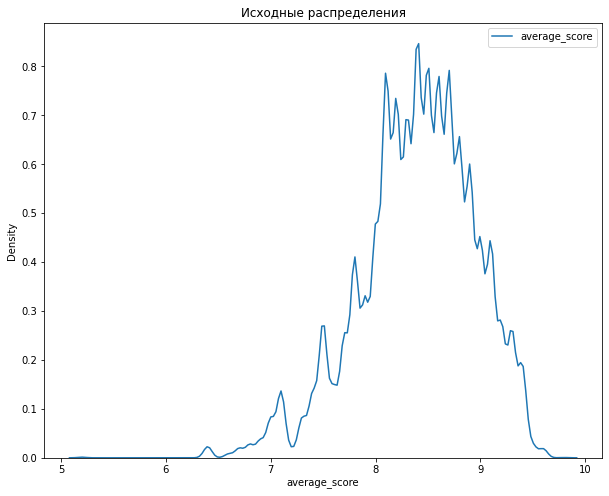

In [139]:
# проверяем распределения по некоторым признакам
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
# sns.kdeplot(data['days_since_review'], ax=ax1, label ='days_since_review')
sns.kdeplot(data['average_score'], ax=ax1, label ='average_score')
plt.legend()

In [140]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [192]:
# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(data.columns)

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='review_total_negative_word_counts', ylabel='Density'>

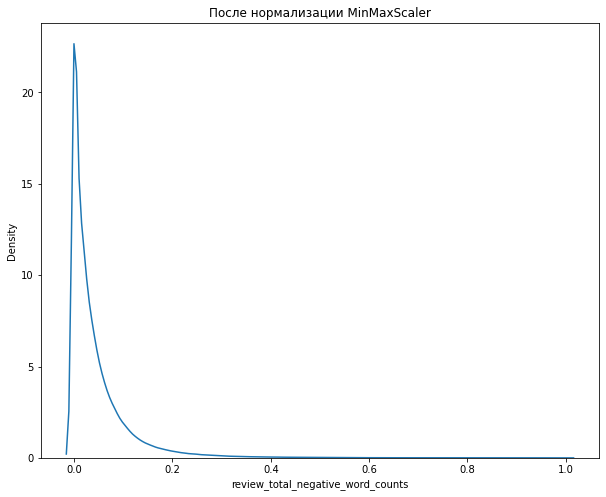

In [193]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(data)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

# sns.kdeplot(df_mm['average_score'], ax=ax1)
sns.kdeplot(df_mm['review_total_negative_word_counts'], ax=ax1)


In [194]:
data = df_mm

In [ ]:
# # инициализируем нормализатор RobustScaler
# r_scaler = preprocessing.RobustScaler()

# # кодируем исходный датасет
# df_r = r_scaler.fit_transform(data)

# # Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
# df_r = pd.DataFrame(df_r, columns=col_names)

# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Распределения после RobustScaler')
# sns.kdeplot(df_r['sample'], ax=ax1)

In [ ]:
# data = df_r

In [201]:
data.drop(data.columns[[-1,-2, -3, -4, -5, -6]], axis = 1, inplace = True)

In [273]:
data.drop(['review_year'], axis = 1, inplace = True)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

### Проверка подготовленных данных

In [164]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [165]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [166]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 35), (386803, 35), (386803, 34), (309442, 34), (77361, 34))

In [167]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [168]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [169]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [170]:
# Пишем свою функцию Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [171]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAE: 0.9149927453755765
MAPE: 13.154063182926985


MAE: 0.9575593933143374
MAPE: 13.805656675782538 (просто замена дней после ревью)

MAE: 0.9583017322620414
MAPE: 13.816437369989057 (поменяла lat и lng)

MAE: 0.9472095801779041
MAPE: 13.670497179251475 (добавила национальность ревьюера)

MAE: 0.94707336699432
MAPE: 13.668719824426045 (добавила страны)

MAE: 0.09470341506363796
MAPE: 13.667979757974615 (нормализация)

MAE: 0.950195989170951
MAPE: 13.696205732099983 (добавила год и месяц отзыва)

MAE: 0.09497401109988772
MAPE: 13.689937616267478 (как выше + нормализация)

MAE: 0.09470216356709825
MAPE: 13.668509432874835 (убрала замену lat и lng, убрала страны, убрала год и месяц)

MAE: 0.09461858111106804
MAPE: 13.656159492378986 (выше + добавила признак пребывания 1 ночь)

MAE: 0.947197017938779
MAPE: 13.671360637509089 (выше без нормализации + добавила ночи пребывания)

MAE: 0.09424994157262706
MAPE: 13.601792700246683 (выше с нормализацией + признаки 1 ночь проживания, отдых, бизнес)

MAE: 0.09425664031833442
MAPE: 13.604397422964373 (выше + страна)

MAE: 0.09416661683535632
MAPE: 13.595243178244425 (выше - бизнес, + couple и мобильный)

MAE: 0.09415568962704847
MAPE: 13.592140296345997 (выше минус страна)

MAE: 0.0941705925927978
MAPE: 13.593583955865391 (выше минус кол-во оценок без отзыва)

MAE: 0.9404649567488474
MAPE: 13.573389442461439 (выше без нормализации, с оценками без отзыва + месяц и год)

MAE: 0.9403173497966549
MAPE: 13.57153057270383 (выше - год)

MAE: 0.9149927453755765
MAPE: 13.154063182926985 (без нормализации и координаты по 0 + разбивка негативного отзыва)

<AxesSubplot:>

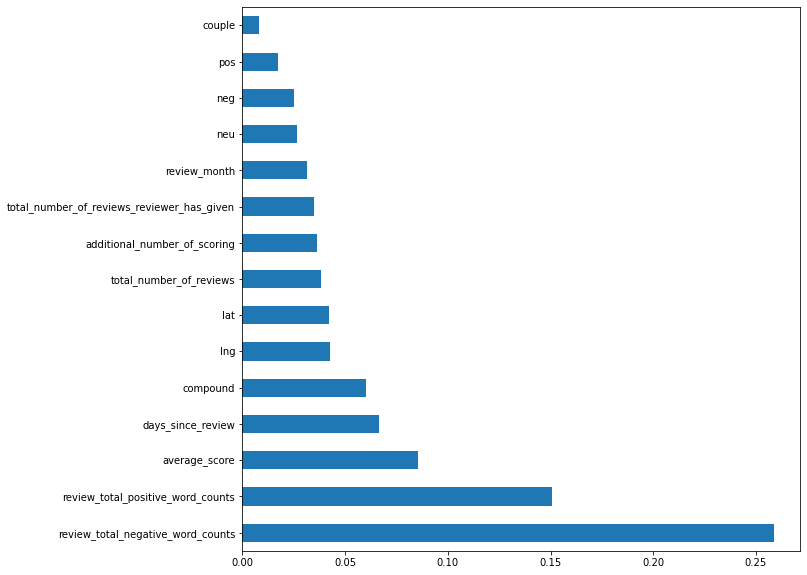

In [172]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [173]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,reviewer_score,...,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,country_Italy,country_Netherlands,country_Spain,country_United Kingdom,country_France,country_Austria
106933,163,9.0,2,1346,39,2,168,41.387048,2.174336,0.0,...,0,1,0,0,0,0,1,0,0,0
83687,156,8.3,216,1494,17,8,545,41.372784,2.172113,0.0,...,1,1,0,0,0,0,1,0,0,0
125822,309,8.1,5,2270,0,1,17,52.351145,4.874076,0.0,...,0,1,1,0,0,1,0,0,0,0
126765,192,8.4,48,1769,18,2,354,52.371443,4.934633,0.0,...,0,0,1,0,0,1,0,0,0,0
66494,421,8.5,0,1802,20,1,556,51.495923,-0.170292,0.0,...,0,0,0,1,0,0,0,1,0,0
33750,220,9.3,2,831,17,2,181,51.506945,-0.141578,0.0,...,1,1,1,1,0,0,0,1,0,0
110161,493,8.6,59,2865,14,22,274,52.376418,4.900220,0.0,...,0,1,1,1,0,1,0,0,0,0
6946,45,9.3,2,180,8,1,104,51.514839,-0.158666,0.0,...,0,1,0,1,0,0,0,1,0,0
12738,114,8.7,39,602,10,2,240,51.515053,-0.173997,0.0,...,0,0,1,1,0,0,0,1,0,0
107729,37,8.7,8,213,0,1,319,48.872579,2.307578,0.0,...,0,1,0,0,0,0,0,0,1,0


In [174]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [175]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [176]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished


In [177]:
predict_submission

array([8.479, 7.442, 7.77 , ..., 8.143, 9.702, 7.347])

In [178]:
list(sample_submission)

['reviewer_score', 'id']

In [179]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.479,488440
1,7.442,274649
2,7.770,374688
3,9.498,404352
4,9.220,451596
5,9.243,302161
6,8.157,317079
7,7.588,13963
8,8.753,159785
9,8.013,195089
